In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from torchvision.utils import save_image

import pandas as pd

import random

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from model_defs import *

In [2]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

In [6]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1722,), (0.3242,))
        ])

In [4]:
# dataset1 = datasets.MNIST('./data', train=True, download=True,
#                        transform=transform)
# dataset2 = datasets.MNIST('./data', train=False, download = True,
#                        transform=transform)

In [5]:
# hyper param
num_epochs = 40
batch_size = 128
learning_rate = 1e-3

In [6]:
dataset = datasets.EMNIST('./data', train = True, transform = transforms.ToTensor(), split = 'letters', download = True)

In [7]:
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [8]:
# model = autoencoder().cuda()
model = autoencoder_v2().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

In [9]:
losses = []
for epoch in tqdm(range(num_epochs)):
    for data in dataloader:
        img, l = data
        img = img.cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.item()))
    losses.append(loss.item())
    
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './dc_img/image_v2_{}.png'.format(epoch))
    
torch.save(model.state_dict(), './conv_autoencoder_v2.pth')

epoch [1/40], loss:0.0250
epoch [2/40], loss:0.0210
epoch [3/40], loss:0.0183
epoch [4/40], loss:0.0164
epoch [5/40], loss:0.0151
epoch [6/40], loss:0.0163
epoch [7/40], loss:0.0164
epoch [8/40], loss:0.0146
epoch [9/40], loss:0.0142
epoch [10/40], loss:0.0151
epoch [11/40], loss:0.0148
epoch [12/40], loss:0.0148
epoch [13/40], loss:0.0135
epoch [14/40], loss:0.0132
epoch [15/40], loss:0.0134
epoch [16/40], loss:0.0145
epoch [17/40], loss:0.0135
epoch [18/40], loss:0.0127
epoch [19/40], loss:0.0135
epoch [20/40], loss:0.0142
epoch [21/40], loss:0.0123
epoch [22/40], loss:0.0130
epoch [23/40], loss:0.0131
epoch [24/40], loss:0.0127
epoch [25/40], loss:0.0138
epoch [26/40], loss:0.0124
epoch [27/40], loss:0.0131
epoch [28/40], loss:0.0125
epoch [29/40], loss:0.0118
epoch [30/40], loss:0.0142
epoch [31/40], loss:0.0132
epoch [32/40], loss:0.0140
epoch [33/40], loss:0.0130
epoch [34/40], loss:0.0120
epoch [35/40], loss:0.0132
epoch [36/40], loss:0.0151
epoch [37/40], loss:0.0122
epoch [38/

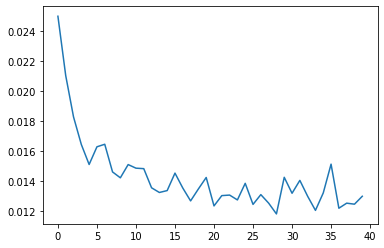

In [10]:
plt.plot(losses)

In [2]:
def re_cons2(img):
    re_img = encode(img.view(1,1,28,28))
    re_img = re_img.cpu()
    imshow(re_img.view(28,28).data.numpy())

encode = autoencoder_v3()
encode.load_state_dict(torch.load('./conv_autoencoder_v3.pth'))

<All keys matched successfully>

In [3]:
def re_cons(img):
    re_img = model(img.view(1,1,28,28).cuda())
    re_img = re_img.cpu()
    imshow(re_img.view(28,28).data.numpy())

In [12]:
mnist = datasets.MNIST('./data', train=True, download = True, transform = transforms.ToTensor())

12650


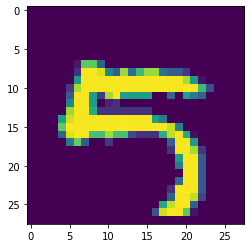

In [13]:
n = random.randint(0,len(mnist))
img = mnist[n][0]
imshow(img.view(28,-1))
print(n)

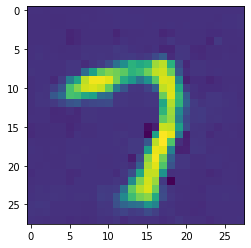

In [68]:
re_cons(img)

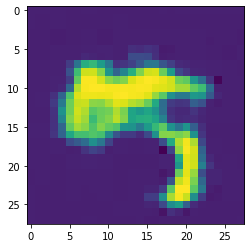

In [14]:
re_cons2(img)